# REFMAP laboratory listening test 1 analysis: JASP Statistical analysis plots

## Setup

In [1]:
# import statements
import sys
import os
import numpy as np
import pandas as pd
from PyQt5.QtWidgets import QFileDialog, QApplication
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# set plot parameters
sns.set_style('white')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE,
       labelsize=MEDIUM_SIZE)    # fontsize of the axes title and x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

mycolours = [(0, 102, 255), (0, 204, 153), (255, 0, 102), (74, 111, 152),
             (251, 164, 49), (204, 153, 255), (90, 192, 255), (80, 245, 233),
             (255, 90, 192), (164, 201, 242), (255, 254, 139), (255, 243, 255)]
mycolours = [tuple(shade/255 for shade in colour) for colour in mycolours]

np.random.seed(303)

# enable copy-on-write mode for Pandas (will be default from Pandas 3.0)
pd.options.mode.copy_on_write = True

# check/open QApplication instance
if not QApplication.instance():
    app = QApplication(sys.argv)
else:
    app = QApplication.instance() 

Set the saveplots toggle to True if plot saving is desired:

In [3]:
saveplots = True

if saveplots:
    # select figure output save path
    outFigPath = QFileDialog.getExistingDirectory(caption=r"Select output folder to save plots")

    # create subfolders if not already existing
    try:
        os.mkdir(os.path.join(outFigPath, "svg"))
    except FileExistsError:
        pass

    try:
        os.mkdir(os.path.join(outFigPath, "pdf"))
    except FileExistsError:
        pass


## Import data and organise

In [4]:
# import test data
fileExts = "*.csv"

# Part A
filepath = list(QFileDialog.getOpenFileName(filter="jaspPtAANOVALAeqXOpMMeans.csv",
                                                      caption=r"Open jaspPtAANOVALAeqXOpMMeans.csv in: \03 Experiment\Experiment 1\Analysis\JASP"))[0]
PtAANOVALAeqXOp = pd.read_csv(filepath, index_col=False)

filepath = list(QFileDialog.getOpenFileName(filter="jaspPtAANOVAAmbEnvXLAeqXOpMMeans.csv",
                                                      caption=r"Open jaspPtAANOVAAmbEnvXLAeqXOpMMeans.csv in: \03 Experiment\Experiment 1\Analysis\JASP"))[0]
PtAANOVAAmbEnvXLAeqXOp = pd.read_csv(filepath, index_col=False)

filepath = list(QFileDialog.getOpenFileName(filter="jaspPtAANOVATypeXOpMMeans.csv",
                                                      caption=r"Open jaspPtAANOVATypeXOpMMeans.csv in: \03 Experiment\Experiment 1\Analysis\JASP"))[0]
PtAANOVATypeXOp = pd.read_csv(filepath, index_col=False)

filepath = list(QFileDialog.getOpenFileName(filter="jaspPtAANOVAAmbEnvXTypeXOpMMeans.csv",
                                                      caption=r"Open jaspPtAANOVAAmbEnvXTypeXOpMMeans.csv in: \03 Experiment\Experiment 1\Analysis\JASP"))[0]
PtAANOVAAmbEnvXTypeXOp = pd.read_csv(filepath, index_col=False)

for dataset in [PtAANOVALAeqXOp, PtAANOVAAmbEnvXLAeqXOp, PtAANOVATypeXOp, PtAANOVAAmbEnvXTypeXOp]:

    dataset['meanCIs'] = np.maximum(dataset['Upper'] - dataset['Marginal_Mean'],
                                    dataset['Marginal_Mean'] - dataset['Lower'])
    dataset['meanCIsSidak'] = np.maximum(dataset['UpperSidak'] - dataset['Marginal_Mean'],
                                         dataset['Marginal_Mean'] - dataset['LowerSidak'])


## Plot figures

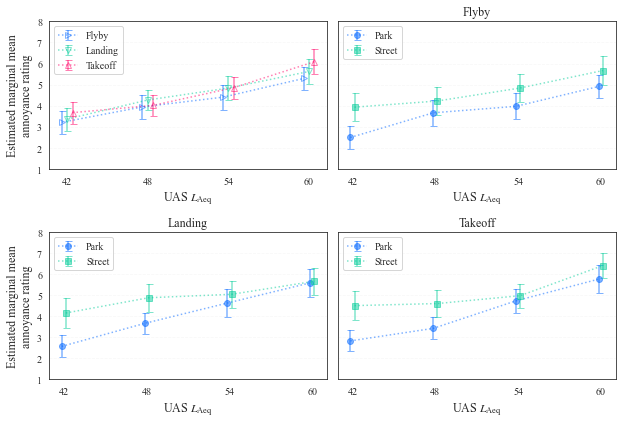

In [7]:
# plot marginal means for interaction

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8.75, 6))

for ii, UASOp in enumerate(pd.unique(PtAANOVALAeqXOp['UAS_Operation'])):
        
    axs[0, 0].errorbar(x=PtAANOVALAeqXOp.loc[(PtAANOVALAeqXOp['UAS_Operation'] == UASOp),
                                       'UAS_LAeq'] + [-0.4, 0, 0.4][ii],
                y=PtAANOVALAeqXOp.loc[(PtAANOVALAeqXOp['UAS_Operation'] == UASOp),
                                       'Marginal_Mean'],
                     yerr=PtAANOVALAeqXOp.loc[(PtAANOVALAeqXOp['UAS_Operation'] == UASOp),
                                                'meanCIs'],
                     fmt=':', ecolor=mycolours[ii], color=mycolours[ii], capsize=3.5,
                     marker=['>', 'v', '^'][ii], markeredgecolor=mycolours[ii], markerfacecolor='none',
                alpha=0.5, label=UASOp)
    axs[0, 0].set(xticks=pd.unique(PtAANOVALAeqXOp['UAS_LAeq']).astype(int),
                  yticks=range(1, 9), xlabel="UAS $L_\\text{Aeq}$",
                  ylabel="Estimated marginal mean" + "\n" + "annoyance rating")
    axs[0, 0].grid(alpha=0.15, linestyle='--', axis='y')
    axs[0, 0].legend(loc='upper left')



for ii, UASOp in enumerate(pd.unique(PtAANOVAAmbEnvXLAeqXOp['UAS_Operation'])):
    ax = axs.ravel()[ii + 1]
    for jj, AmbEnv in enumerate(pd.unique(PtAANOVAAmbEnvXLAeqXOp['Ambient_Env'])):
        
        ax.errorbar(x=PtAANOVAAmbEnvXLAeqXOp.loc[(PtAANOVAAmbEnvXLAeqXOp['UAS_Operation'] == UASOp)
                                                      & (PtAANOVAAmbEnvXLAeqXOp['Ambient_Env'] == AmbEnv),
                                                      'UAS_LAeq'] + [-0.15, 0.15][jj],
                         y=PtAANOVAAmbEnvXLAeqXOp.loc[(PtAANOVAAmbEnvXLAeqXOp['UAS_Operation'] == UASOp)
                                                      & (PtAANOVAAmbEnvXLAeqXOp['Ambient_Env'] == AmbEnv),
                                                      'Marginal_Mean'],
                         yerr=PtAANOVAAmbEnvXLAeqXOp.loc[(PtAANOVAAmbEnvXLAeqXOp['UAS_Operation'] == UASOp)
                                                         & (PtAANOVAAmbEnvXLAeqXOp['Ambient_Env'] == AmbEnv),
                                                        'meanCIs'],
                         fmt=':', ecolor=mycolours[jj], color=mycolours[jj], capsize=3.5,
                         marker=['o', 's'][jj], markeredgecolor=mycolours[jj], markerfacecolor=mycolours[jj],
                    alpha=0.5, label=AmbEnv)
    ax.set(xticks=pd.unique(PtAANOVAAmbEnvXLAeqXOp['UAS_LAeq']).astype(int),
           xticklabels=pd.unique(PtAANOVAAmbEnvXLAeqXOp['UAS_LAeq']), xlabel="UAS $L_\\text{Aeq}$",
           yticks=range(1, 9), title=UASOp)
    ax.grid(alpha=0.15, linestyle='--', axis='y')
    ax.legend(loc='upper left')
    if ii == 1:
        ax.set(ylabel="Estimated marginal mean" + "\n" + "annoyance rating", yticks=range(1, 9))
    else:
        ax.set(yticklabels=[])

 

if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", "jaspPtAANOVAAmbEnvXLAeqXOpEMMs.svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", "jaspPtAANOVAAmbEnvXLAeqXOpEMMs.pdf"),
                format='pdf')

plt.show()

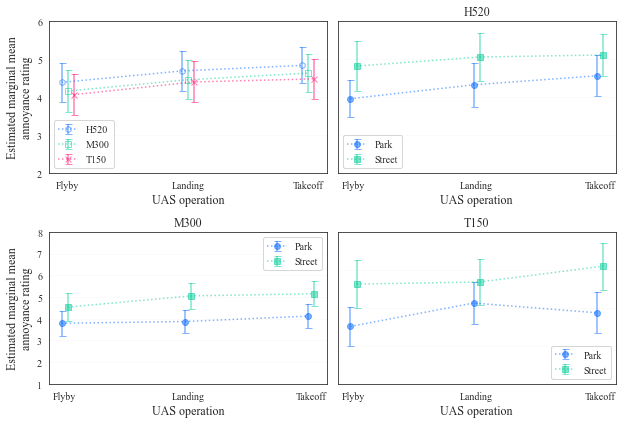

In [8]:
# plot marginal means for interaction

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8.75, 6))

for ii, UASType in enumerate(pd.unique(PtAANOVATypeXOp['UAS_Type'])):
        
    axs[0, 0].errorbar(x=np.arange(0, 3) + [-0.05, 0, 0.05][ii],
                y=PtAANOVATypeXOp.loc[(PtAANOVATypeXOp['UAS_Type'] == UASType),
                                       'Marginal_Mean'],
                     yerr=PtAANOVATypeXOp.loc[(PtAANOVATypeXOp['UAS_Type'] == UASType),
                                                'meanCIs'],
                     fmt=':', ecolor=mycolours[ii], color=mycolours[ii], capsize=3.5,
                     marker=['h', 's', 'x'][ii], markeredgecolor=mycolours[ii], markerfacecolor='none',
                alpha=0.5, label=UASType)
    axs[0, 0].set(xticks=range(0, 3), xticklabels=pd.unique(PtAANOVATypeXOp['UAS_Operation']),
                  yticks=range(2, 7), xlabel="UAS operation",
                  ylabel="Estimated marginal mean" + "\n" + "annoyance rating")
    axs[0, 0].grid(alpha=0.15, linestyle='--', axis='y')
    axs[0, 0].legend(loc='best')



for ii, UASType in enumerate(pd.unique(PtAANOVAAmbEnvXTypeXOp['UAS_Type'])):
    ax = axs.ravel()[ii + 1]
    for jj, AmbEnv in enumerate(pd.unique(PtAANOVAAmbEnvXTypeXOp['Ambient_Env'])):
        
        ax.errorbar(x=np.arange(0, 3) + [-0.025, 0.025][jj],
                         y=PtAANOVAAmbEnvXTypeXOp.loc[(PtAANOVAAmbEnvXTypeXOp['UAS_Type'] == UASType)
                                                      & (PtAANOVAAmbEnvXTypeXOp['Ambient_Env'] == AmbEnv),
                                                      'Marginal_Mean'],
                         yerr=PtAANOVAAmbEnvXTypeXOp.loc[(PtAANOVAAmbEnvXTypeXOp['UAS_Type'] == UASType)
                                                         & (PtAANOVAAmbEnvXTypeXOp['Ambient_Env'] == AmbEnv),
                                                        'meanCIs'],
                         fmt=':', ecolor=mycolours[jj], color=mycolours[jj], capsize=3.5,
                         marker=['o', 's'][jj], markeredgecolor=mycolours[jj], markerfacecolor=mycolours[jj],
                    alpha=0.5, label=AmbEnv)
    ax.set(xticks=range(0,3),
           xticklabels=pd.unique(PtAANOVAAmbEnvXTypeXOp['UAS_Operation']),
           xlabel="UAS operation",
           yticks=range(2, 7), title=UASType)
    ax.grid(alpha=0.15, linestyle='--', axis='y')
    ax.legend(loc='best')
    if ii == 1:
        ax.set(ylabel="Estimated marginal mean" + "\n" + "annoyance rating", yticks=range(1, 9))
    else:
        ax.set(yticklabels=[])

 

if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", "jaspPtAANOVAAmbEnvXTypeXOpEMMs.svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", "jaspPtAANOVAAmbEnvXTypeXOpEMMs.pdf"),
                format='pdf')

plt.show()